<a href="https://colab.research.google.com/github/Hannah1123/uts-deeplearng2020.ipynb/blob/master/CNN_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LOAD DATASET

In [ ]:
# Connecting to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import os
import numpy as np
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import cv2
import seaborn as sns
%load_ext tensorboard


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Changing to the working directory to access sample images
cd /content/gdrive/My Drive/42028-DL-CNN-2020/MNIST

/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST


In [ ]:
!cp '/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/train-images-idx3-ubyte.gz' train-images-idx3-ubyte.gz


cp: cannot stat '/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/train-images-idx3-ubyte.gz': No such file or directory


In [ ]:
!gunzip train-images-idx3-ubyte.gz

ERROR! Session/line number was not unique in database. History logging moved to new session 59
gzip: train-images-idx3-ubyte already exists; do you wish to overwrite (y or n)? y


In [ ]:
pwd

'/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST'

In [ ]:
!gunzip train-labels-idx1-ubyte.gz

In [ ]:
!gunzip t10k-images-idx3-ubyte.gz
!gunzip t10k-labels-idx1-ubyte.gz

In [ ]:
X_train_fla, y_train = loadlocal_mnist(
        images_path='/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/train-images-idx3-ubyte', 
        labels_path='/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/train-labels-idx1-ubyte')

In [ ]:
print('Dimensions: %s x %s' % (X_train_fla.shape[0], X_train_fla.shape[1]))
#print('\n1st row', X_train[0])

Dimensions: 60000 x 784


In [ ]:

print('Digits:  0 1 2 3 4 5 6 7 8 9')
print('labels: %s' % np.unique(y_train))
print('Class distribution: %s' % np.bincount(y_train))

Digits:  0 1 2 3 4 5 6 7 8 9
labels: [0 1 2 3 4 5 6 7 8 9]
Class distribution: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [ ]:
np.savetxt(fname='/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/train-images.csv', 
           X=X, delimiter=',', fmt='%d')
np.savetxt(fname='//content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/train-labels.csv', 
           X=y, delimiter=',', fmt='%d')

In [ ]:
X_test_fla, y_test = loadlocal_mnist(
        images_path='/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/t10k-images-idx3-ubyte', 
        labels_path='/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/t10k-labels-idx1-ubyte')

In [ ]:
np.savetxt(fname='/content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/test-images.csv', 
           X=X, delimiter=',', fmt='%d')
np.savetxt(fname='//content/gdrive/My Drive/42028-DL-CNN-2020/MNIST/test-labels.csv', 
           X=y, delimiter=',', fmt='%d')

In [ ]:
print('Dimensions: %s x %s' % (X_test.shape[0], X_test.shape[1]))

Dimensions: 10000 x 784


####visualization

In [ ]:
# reshape train and test data
X_train=X_train_fla.reshape(-1,28,28)
X_test=X_test_fla.reshape(-1,28,28)

# print the size of the result reshaped train and test data splits

print("Train dataset after reshaping:{}".format(np.shape(X_train)))
print("Test dataset after reshaping :{}".format(np.shape(X_test)))

Train dataset after reshaping:(60000, 28, 28)
Test dataset after reshaping :(10000, 28, 28)


Text(0.5, 1.0, '6')

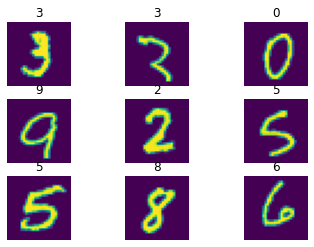

In [ ]:
# view few images and print its corresponding label
labelNames = ["0", "1", "2", "3", "4",
	"5", "6", "7", "8", "9"]
img_index = 10
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.axis('off')
ax1.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax2 = fig.add_subplot(3,3,2)
ax2.axis('off')
img_index = 500
ax2.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax3 = fig.add_subplot(3,3,3)
ax3.axis('off')
img_index = 1000
ax3.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax4 = fig.add_subplot(3,3,4)
ax4.axis('off')
img_index = 3000
ax4.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax5 = fig.add_subplot(3,3,5)
ax5.axis('off')
img_index = 10300
ax5.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax6 = fig.add_subplot(3,3,6)
ax6.axis('off')
img_index = 15000
ax6.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax7 = fig.add_subplot(3,3,7)
ax7.axis('off')
img_index = 20000
ax7.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax8 = fig.add_subplot(3,3,8)
ax8.axis('off')
img_index = 30050
ax8.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

ax9 = fig.add_subplot(3,3,9)
ax9.axis('off')
img_index = 50002
ax9.imshow(X_train[img_index])
plt.title(labelNames[y_train[img_index]])

In [ ]:
X_train[img_index].shape

(28, 28)

####normalization
-In the experimentals of LBP, normalization does not applied 

In [ ]:
X_train_fla = X_train_fla/255.0
X_test_fla = X_test_fla/255.0

##LBP  
training data feature extraction

In [ ]:
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius
 
	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		# median filters are applied
		i=0
		for i in range(5):
		  image = cv2.medianBlur(image, 3)
		  i = i+1
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))
 
		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)
 
		# return the histogram of Local Binary Patterns
		return hist

In [ ]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
desc = LocalBinaryPatterns(24, 8)
data_train_lbp = []
labels_train_lbp = []


# loop over the training images
for img_index in range(60000):   
	# load the train image, and extract LBP features
	image_lbp = (X_train[img_index])
	hist = desc.LBPfeatures(image_lbp)

	labels_train_lbp.append(y_train[img_index])
	data_train_lbp.append(hist)

##HOG  
training data feature extraction

In [ ]:
# initialize the data matrix and labels
print("Extracting features from training dataset...")
data_train_hog = []
labels_train_hog = []

# loop over the training images
for img_index in range(len(X_train)):
  # load the image, and extract HOG features it
 
  image_hog = (X_train[img_index])# Complete the code 
  
  # Hint: use orientation =9, pixel_per_cell=(10,10), cells_per_block=2,2, 
  # transform_sqrt=True and block_norm="L2-Hys"
  # 
  H_train = feature.hog(image_hog, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2), block_norm='L1', transform_sqrt=True) # Complete the code 
 
  # update the data and labels
  data_train_hog.append(H_train) # Complete the code 
  labels_train_hog.append(y_train[img_index]) # Complete the code 
## END YOUR CODE HERE ##
print(np.shape(data_train_hog))
print(np.shape(labels_train_hog))

Extracting features from training dataset...
(60000, 144)
(60000,)


##KNN

###KNN_RAW

In [ ]:
clf_raw=KNeighborsClassifier(n_neighbors=7)
clf_raw.fit(X_train_fla, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
acc_train_raw = clf_raw.score(X_train_fla, y_train)
print('Train set accuracy: ', acc_train_raw)

Train set accuracy:  0.97915


In [ ]:
predictions_knn_raw = clf_raw.predict(X_test_fla)
print("Test raw_knn Accuracy: {:.2f}".format(clf_raw.score(X_test_fla,y_test)))

Test raw_knn Accuracy: 0.97


In [ ]:
print(metrics.confusion_matrix(y_test, predictions_knn_raw))

[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]


###KNN_HOG

In [ ]:
clf_hog=KNeighborsClassifier(n_neighbors=7)

In [ ]:
clf_hog.fit(data_train_hog, labels_train_hog)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
acc_train_hog = clf_hog.score(data_train_hog, labels_train_hog)
print('Train set accuracy: ', acc_train_hog)

Train set accuracy:  0.9595333333333333


In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
labels_test_nn_hog = []
data_test_nn_hog=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  
  img_hog= X_test[img_ind]
  H_test = feature.hog(img_hog,orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2),\
                  block_norm='L1', transform_sqrt=True) 
  # Hint: use same settings as used in training phase
  
  data_test_nn_hog.append(H_test) #数据特征
  
  labels_test_nn_hog.append(y_test[img_ind])

  
  
print(np.shape(data_test_nn_hog))
print(np.shape(labels_test_nn_hog))

Extracting features from test dataset...
(10000, 144)
(10000,)


In [ ]:
predictions_knn_hog = clf_hog.predict(data_test_nn_hog)

In [ ]:
print("Test lbp_knn Accuracy: {:.2f}".format(clf_hog.score(data_test_nn_hog,labels_test_nn_hog)))

Test lbp_knn Accuracy: 0.94


In [ ]:
print(metrics.confusion_matrix(labels_test_nn_hog, predictions_knn_hog))

[[ 968    2    1    2    0    0    3    0    1    3]
 [   4 1121    3    0    2    0    1    1    2    1]
 [   5    0  953   36    1    1    5   13   10    8]
 [   2    0   17  937    0    8    2    6   22   16]
 [  16    3    0    0  889    0   14    6    4   50]
 [   7    0    0   32    1  819    9    1   14    9]
 [   6    1    0    0    4    5  940    0    2    0]
 [   0    4   12   11   16    1    0  908    8   68]
 [  10    2    1   13    0    4    1    0  921   22]
 [   7    1    1    7    6    3    0   10   28  946]]


Text(0.5, 1.0, '1')

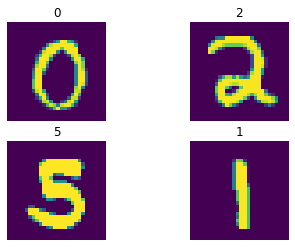

In [ ]:
img_index = 13
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_test[img_index])
plt.title(labelNames[predictions_knn_hog[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 503
ax2.imshow(X_test[img_index])
plt.title(labelNames[predictions_knn_hog[img_index]])

ax3 = fig.add_subplot(2,2,3)
ax3.axis('off')
img_index = 1003
ax3.imshow(X_test[img_index])
plt.title(labelNames[predictions_knn_hog[img_index]])

ax4 = fig.add_subplot(2,2,4)
ax4.axis('off')
img_index = 3003
ax4.imshow(X_test[img_index])
plt.title(labelNames[predictions_knn_hog[img_index]])


###KNN_LBP

i=5: training_acc increase  
but test remain same

In [ ]:
clf_lbp=KNeighborsClassifier(n_neighbors=7)

In [ ]:
clf_lbp.fit(data_train_lbp, labels_train_lbp)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
acc_train_lbp = clf_lbp.score(data_train_lbp, labels_train_lbp)
print('Train set accuracy: ', acc_train_lbp)

Train set accuracy:  0.6041


In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")

data_test_nn_lbp=[]
labels_test_nn_lbp=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier


for im_index in range(len(X_test)):
  imag_lbp = X_test[im_index]
  
  # Extract LBP feature
  histo = desc.LBPfeatures(imag_lbp)

  data_test_nn_lbp.append(histo)
  labels_test_nn_lbp.append(y_test[im_index])

print(np.shape(data_test_nn_lbp))
print(np.shape(labels_test_nn_lbp))

Extracting features from test dataset...
(10000, 26)
(10000,)


In [ ]:
predictions_knn_lbp = clf_lbp.predict(data_test_nn_lbp)
print("Test hot_knn Accuracy: {:.2f}".format(clf_lbp.score(data_test_nn_lbp,labels_test_nn_lbp)))

Test hot_knn Accuracy: 0.49


In [ ]:
print(metrics.confusion_matrix(labels_test_nn_lbp, predictions_knn_lbp))

[[ 885    0   11   13    2   23   11   16    5   14]
 [   0 1103    7    2    0    2    1   18    2    0]
 [  23   12  450  158   67   58   57  111   79   17]
 [  22   20  227  291   50  103   53  126   98   20]
 [   4    7   87   72  443   53   79   41   41  155]
 [  61   18  166  188   91  180   43   83   30   32]
 [  36    8  189  111   90   65  195   52   97  115]
 [  18   77   97  119   45   96   47  489   17   23]
 [  32    4  129  111   40   45   92   12  460   49]
 [  48    9   38   71  196   51  139   36   64  357]]


##SVM

###SVM_RAW

In [ ]:
model_svm_raw = svm.SVC(C=1.0, kernel='rbf') 
# Start training the SVM classifier 
model_svm_raw.fit(X_train_fla, y_train)

print("Train set Accuracy: {:.2f}".format(model_svm_raw.score(X_train_fla, y_train)))

Train set Accuracy: 0.99


In [ ]:
predictions_svm_raw = model_svm_raw.predict(X_test_fla)
accuracy_svm_raw = metrics.accuracy_score(y_test, predictions_svm_raw)
print("Accuracy on test dataset:",accuracy_svm_raw)

Accuracy on test dataset: 0.9792


In [ ]:
print(metrics.confusion_matrix(y_test, predictions_svm_raw))

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


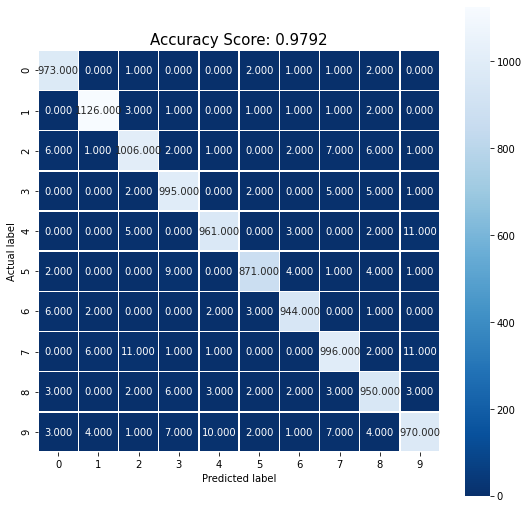

In [ ]:
# Plot confusion matrix using seaborn library
cm = metrics.confusion_matrix(y_test, predictions_svm_raw)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_svm_raw)
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, '7')

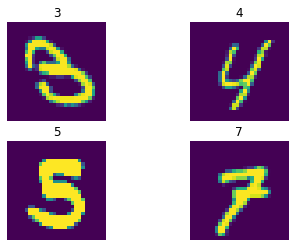

In [ ]:
img_index = 18
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_test[img_index])
plt.title(predictions_svm_raw[img_index])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 555
ax2.imshow(X_test[img_index])
plt.title(predictions_svm_raw[img_index])

ax3 = fig.add_subplot(2,2,3)
ax3.axis('off')
img_index = 1003
ax3.imshow(X_test[img_index])
plt.title(predictions_svm_raw[img_index])

ax4 = fig.add_subplot(2,2,4)
ax4.axis('off')
img_index = 2334
ax4.imshow(X_test[img_index])
plt.title(predictions_svm_raw[img_index])


###SVM_LBP

In [ ]:
model_svm_lbp = svm.SVC(C=100.0, kernel='rbf', gamma=1/2) 
# Start training the SVM classifier 
model_svm_lbp.fit(data_train_lbp, labels_train_lbp)


print(np.shape(data_train_lbp))
print(np.shape(labels_train_lbp))

(60000, 26)
(60000,)


In [ ]:
# Check the training accuray
print("Train set Accuracy: {:.2f}".format(model_svm_lbp.score(data_train_lbp,labels_train_lbp)))


Train set Accuracy: 0.48


In [ ]:
predictions_svm_lbp=[]
predict_label_svm_lbp=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier

for im_index in range(len(X_test)):
  imag_lbp = X_test[im_index]
  
  # Extract LBP feature
  histo = desc.LBPfeatures(imag_lbp)
  # Perform classification
  prediction_svm_lbp = model_svm_lbp.predict(histo.reshape(1, -1))


  
  # Store the classfication result
  predictions_svm_lbp.append(prediction_svm_lbp)
  predict_label_svm_lbp.append(y_test[im_index])

In [ ]:
print(len(predictions_svm_lbp))
print(len(predict_label_svm_lbp))

10000
10000


In [ ]:
accuracy_svm_lbp = metrics.accuracy_score(y_test, predictions_svm_lbp)
print("Accuracy on test dataset:",accuracy_svm_lbp)

Accuracy on test dataset: 0.5078


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[1]')

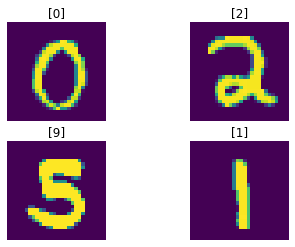

In [ ]:
img_index = 13
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_test[img_index])
plt.title(predictions_svm_lbp[img_index])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 503
ax2.imshow(X_test[img_index])
plt.title(predictions_svm_lbp[img_index])

ax3 = fig.add_subplot(2,2,3)
ax3.axis('off')
img_index = 1003
ax3.imshow(X_test[img_index])
plt.title(predictions_svm_lbp[img_index])

ax4 = fig.add_subplot(2,2,4)
ax4.axis('off')
img_index = 3003
ax4.imshow(X_test[img_index])
plt.title(predictions_svm_lbp[img_index])


###SVM_HOG

In [ ]:
model_svm_hog = svm.SVC(C=1.0, kernel='rbf')
model_svm_hog.fit(data_train_hog, labels_train_hog)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Train set Accuracy: {:.2f}".format(model_svm_hog.score(data_train_hog,labels_train_hog)))

Train set Accuracy: 0.98


In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
predict_test_svm_hog = []
labels_test_svm_hog = []
data_test_svm_hog=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  
  img_hog= X_test[img_ind]
  H_test = feature.hog(img_hog,orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2),\
                  block_norm='L1', transform_sqrt=True) 
  # Hint: use same settings as used in training phase
  
  pred_svm_hog = model_svm_hog.predict(H_test.reshape(1, -1))[0] #将H变为一维的向量
  # update the data and labels
  predict_test_svm_hog.append(pred_svm_hog) #预测类别
  data_test_svm_hog.append(H_test) #数据特征
  
  labels_test_svm_hog.append(y_test[img_ind])
  
  
print(np.shape(predict_test_svm_hog))
print(np.shape(labels_test_svm_hog))

Extracting features from test dataset...
(10000,)
(10000,)


In [ ]:
# Test set Accuracy

accuracy_svm_hog = metrics.accuracy_score(y_test, predict_test_svm_hog)
print("Accuracy on test dataset:",accuracy_svm_hog)


Accuracy on test dataset: 0.9751


Text(0.5, 1.0, '1')

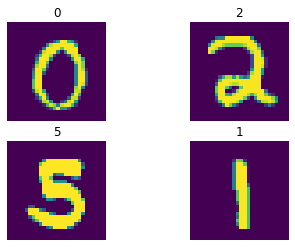

In [ ]:
img_index = 13
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.axis('off')
ax1.imshow(X_test[img_index])
plt.title(labelNames[predict_test_svm_hog[img_index]])

ax2 = fig.add_subplot(2,2,2)
ax2.axis('off')
img_index = 503
ax2.imshow(X_test[img_index])
plt.title(labelNames[predict_test_svm_hog[img_index]])

ax3 = fig.add_subplot(2,2,3)
ax3.axis('off')
img_index = 1003
ax3.imshow(X_test[img_index])
plt.title(labelNames[predict_test_svm_hog[img_index]])

ax4 = fig.add_subplot(2,2,4)
ax4.axis('off')
img_index = 3003
ax4.imshow(X_test[img_index])
plt.title(labelNames[predict_test_svm_hog[img_index]])


##ANN

###ANN_RAW

####ANN_RAW_ADAM

In [ ]:
valid_images_nn_raw = X_train_fla[:5000]
valid_labels_nn_raw = y_train[:5000]

data_train_nn_raw = X_train_fla[5000:]
labels_train_nn_raw = y_train[5000:]

In [ ]:
print(np.shape(data_train_nn_raw))
print(np.shape(valid_images_nn_raw))
print(data_train_nn_raw.dtype)
print(labels_train_nn_raw.dtype)

(55000, 784)
(5000, 784)
float64
uint8


In [ ]:
model_nn_raw = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(784,)), 
                              tf.keras.layers.Dense(256, activation=tf.nn.relu),\
                              tf.keras.layers.Dense(256, activation=tf.nn.relu),
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model_nn_raw.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H_raw=model_nn_raw.fit(data_train_nn_raw, labels_train_nn_raw, epochs=100, validation_data=(valid_images_nn_raw, valid_labels_nn_raw))

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2050 - accuracy: 0.9380 - val_loss: 0.1019 - val_accuracy: 0.9702
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9734 - val_loss: 0.0824 - val_accuracy: 0.9752
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0578 - accuracy: 0.9814 - val_loss: 0.1025 - val_accuracy: 0.9710
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0438 - accuracy: 0.9856 - val_loss: 0.0769 - val_accuracy: 0.9780
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0697 - val_accuracy: 0.9794
Epoch 6/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0758 - val_accuracy: 0.9798
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0727 - val_ac

In [ ]:
model_nn_raw.evaluate(X_test_fla, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.9809


[0.4118165373802185, 0.98089998960495]

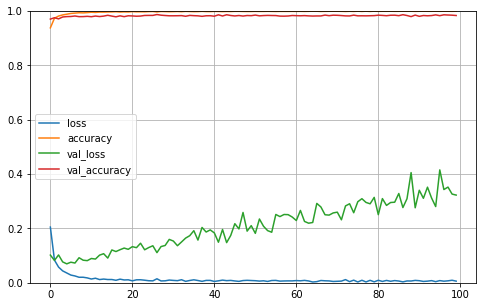

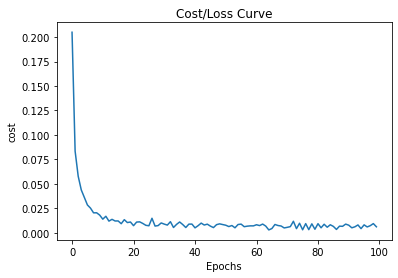

In [ ]:
## Plot the learning curves 
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H_raw.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H_raw.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [ ]:
model_nn_raw.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


####ANN_RAW_SGD

In [ ]:
model_nn_raw_sgd = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                              tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(128, activation=tf.nn.relu),
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model_nn_raw_sgd.compile(optimizer = tf.optimizers.SGD(0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H_raw_sgd=model_nn_raw_sgd.fit(data_train_nn_raw, labels_train_nn_raw, epochs=100, validation_data=(valid_images_nn_raw, valid_labels_nn_raw))

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.8194 - accuracy: 0.5020 - val_loss: 1.3081 - val_accuracy: 0.7208
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9934 - accuracy: 0.7801 - val_loss: 0.7574 - val_accuracy: 0.8196
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6623 - accuracy: 0.8384 - val_loss: 0.5633 - val_accuracy: 0.8586
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5315 - accuracy: 0.8634 - val_loss: 0.4720 - val_accuracy: 0.8782
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4636 - accuracy: 0.8767 - val_loss: 0.4194 - val_accuracy: 0.8888
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4217 - accuracy: 0.8862 - val_loss: 0.3847 - val_accuracy: 0.8962
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3932 - accuracy: 0.8926 - val_loss: 0.3614 - val_ac

In [ ]:
model_nn_raw_sgd.evaluate(X_test_fla, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9641


[0.11879688501358032, 0.9641000032424927]

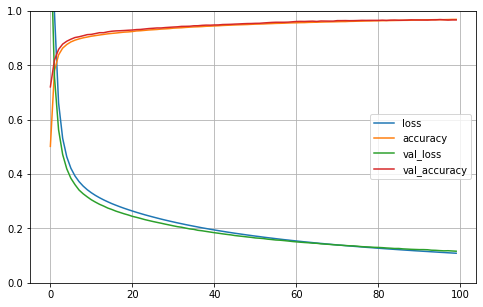

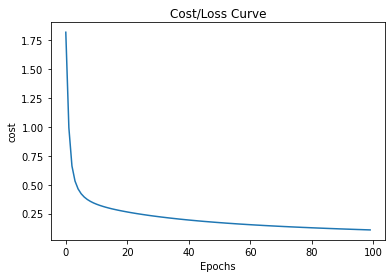

In [ ]:
pd.DataFrame(H_raw_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H_raw_sgd.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

###ANN_LBP

####ANN_LBP_ADEM

In [ ]:
data_train_lbp = np.array(data_train_lbp)
labels_train_lbp = np.array(labels_train_lbp)

valid_images_lbp = data_train_lbp[:5000]
valid_labels_lbp = labels_train_lbp[:5000]


data_train_lbp_nn = data_train_lbp[5000:]
labels_train_lbp_nn = labels_train_lbp[5000:]

In [ ]:
print(np.shape(data_train_lbp_nn))
print(np.shape(valid_images_lbp))
print(data_train_lbp_nn.dtype)
print(labels_train_lbp_nn.dtype)

(55000, 26)
(5000, 26)
float64
uint8


In [ ]:
model_nn_lbp = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(26,)), 
                              tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(128, activation=tf.nn.relu),
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model_nn_lbp.compile(optimizer = tf.optimizers.Adam(0.0065),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H_lbp=model_nn_lbp.fit(data_train_lbp_nn, labels_train_lbp_nn, epochs=100, validation_data=(valid_images_lbp, valid_labels_lbp))

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.5986 - accuracy: 0.4190 - val_loss: 1.4556 - val_accuracy: 0.4760
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.4352 - accuracy: 0.4797 - val_loss: 1.4128 - val_accuracy: 0.4906
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3967 - accuracy: 0.4942 - val_loss: 1.4055 - val_accuracy: 0.4996
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3670 - accuracy: 0.5082 - val_loss: 1.3950 - val_accuracy: 0.4996
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3451 - accuracy: 0.5168 - val_loss: 1.3157 - val_accuracy: 0.5342
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3293 - accuracy: 0.5235 - val_loss: 1.2847 - val_accuracy: 0.5470
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 1.3165 - accuracy: 0.5278 - val_loss: 1.2677 - val_ac

In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")

data_test_nn_lbp=[]
labels_test_nn_lbp=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier


for im_index in range(len(X_test)):
  imag_lbp = X_test[im_index]
  
  # Extract LBP feature
  histo = desc.LBPfeatures(imag_lbp)

  data_test_nn_lbp.append(histo)
  labels_test_nn_lbp.append(y_test[im_index])

print(np.shape(data_test_nn_lbp))
print(np.shape(labels_test_nn_lbp))

Extracting features from test dataset...
(10000, 26)
(10000,)


In [ ]:
data_test_nn_lbp = np.array(data_test_nn_lbp)
labels_test_nn_lbp = np.array(labels_test_nn_lbp)
#labels_test_nn_hog = img_as_float(labels_test_nn_hog)

print(data_test_nn_lbp.dtype)
print(labels_test_nn_lbp.dtype)

float64
uint8


In [ ]:
model_nn_lbp.evaluate(data_test_nn_lbp, labels_test_nn_lbp)

313/313 [==============================] - 0s 1ms/step - loss: 1.2202 - accuracy: 0.5748


[1.2201799154281616, 0.5748000144958496]

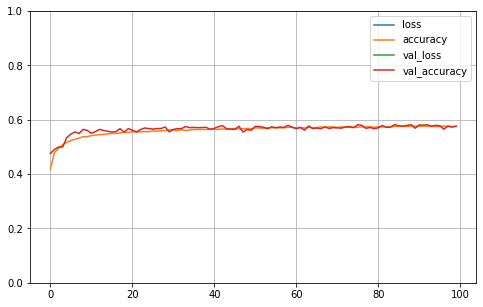

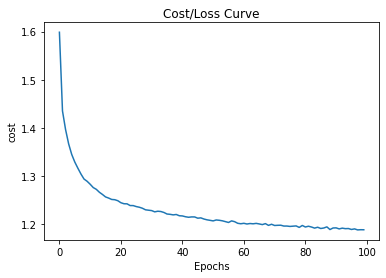

In [ ]:
## Plot the learning curves 
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H_lbp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H_lbp.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

####ANN_LBP_SGD

In [ ]:
model_nn_lbp_sgd = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(26,)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])## create a model here

model_nn_lbp_sgd.compile(optimizer = tf.optimizers.SGD(0.03),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) ## add the required arguments

H_nn_lbp_sgd=model_nn_lbp_sgd.fit(data_train_lbp_nn, labels_train_lbp_nn, epochs=100, validation_data=(valid_images_lbp, valid_labels_lbp))

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 2.2731 - accuracy: 0.1526 - val_loss: 2.2122 - val_accuracy: 0.2176
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 2.0603 - accuracy: 0.2425 - val_loss: 1.9463 - val_accuracy: 0.2724
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 1.9196 - accuracy: 0.2829 - val_loss: 1.8824 - val_accuracy: 0.2930
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 1.8870 - accuracy: 0.2954 - val_loss: 1.9236 - val_accuracy: 0.2906
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 1.8641 - accuracy: 0.3067 - val_loss: 1.8603 - val_accuracy: 0.3040
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 1.8431 - accuracy: 0.3177 - val_loss: 1.8712 - val_accuracy: 0.3044
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 1.8112 - accuracy: 0.3373 - val_loss: 1.7729 - val_ac

In [ ]:
model_nn_lbp_sgd.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 26)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3456      
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 21,258
Trainable params: 21,258
Non-trainable params: 0
_________________________________________________________________


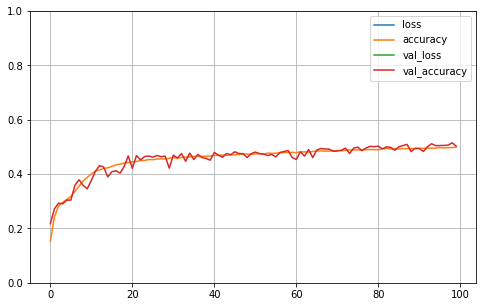

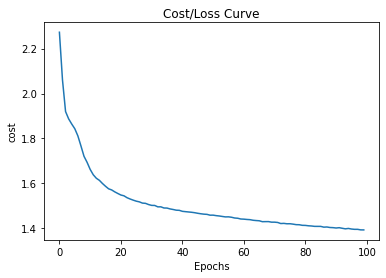

In [ ]:
## Plot the learning curves 
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H_nn_lbp_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H_nn_lbp_sgd.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

In [ ]:
## Evaluate the model's performance on test dataset.
model_nn_lbp_sgd.evaluate(data_test_nn_lbp, labels_test_nn_lbp)

313/313 [==============================] - 0s 1ms/step - loss: 1.3551 - accuracy: 0.5157


[1.3550697565078735, 0.5156999826431274]

###ANN_HOG

####ANN_HOG_ADAM

In [ ]:
data_train_hog = np.array(data_train_hog)
labels_train_hog = np.array(labels_train_hog)

valid_images_hog = data_train_hog[:5000]
valid_labels_hog = labels_train_hog[:5000]


data_train_hog_nn = data_train_hog[5000:]
labels_train_hog_nn = labels_train_hog[5000:]


In [ ]:
print(np.shape(data_train_hog_nn))
print(np.shape(valid_images_hog))
print(data_train_hog_nn.dtype)
print(labels_train_hog_nn.dtype)

(55000, 144)
(5000, 144)
float64
uint8


In [ ]:
model_nn_hog = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(144,)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model_nn_hog.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model_nn_hog.fit(data_train_hog_nn, labels_train_hog_nn, epochs=500,validation_data=(valid_images_hog, valid_labels_hog))

Epoch 1/500
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3705 - accuracy: 0.8923 - val_loss: 0.1788 - val_accuracy: 0.9454
Epoch 2/500
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1634 - accuracy: 0.9482 - val_loss: 0.1417 - val_accuracy: 0.9542
Epoch 3/500
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1360 - accuracy: 0.9565 - val_loss: 0.1198 - val_accuracy: 0.9604
Epoch 4/500
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1185 - accuracy: 0.9614 - val_loss: 0.1295 - val_accuracy: 0.9550
Epoch 5/500
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9652 - val_loss: 0.0997 - val_accuracy: 0.9676
Epoch 6/500
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0957 - accuracy: 0.9679 - val_loss: 0.0978 - val_accuracy: 0.9682
Epoch 7/500
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0875 - accuracy: 0.9713 - val_loss: 0.1047 - val_ac

In [ ]:
# initialize the data matrix and labels
print("Extracting features from test dataset...")
labels_test_nn_hog = []
data_test_nn_hog=[]
# loop over the training images
for img_ind in range(len(X_test)):
  # load the image, and extract HOG features
  
  img_hog= X_test[img_ind]
  H_test = feature.hog(img_hog,orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2),\
                  block_norm='L1', transform_sqrt=True) 
  # Hint: use same settings as used in training phase
  
  data_test_nn_hog.append(H_test) #数据特征
  
  labels_test_nn_hog.append(y_test[img_ind])

  
  
print(np.shape(data_test_nn_hog))
print(np.shape(labels_test_nn_hog))

Extracting features from test dataset...
(10000, 144)
(10000,)


In [ ]:
data_test_nn_hog = np.array(data_test_nn_hog)
labels_test_nn_hog = np.array(labels_test_nn_hog)
#labels_test_nn_hog = img_as_float(labels_test_nn_hog)

print(data_test_nn_hog.dtype)
print(labels_test_nn_hog.dtype)

float64
uint8


In [ ]:
model_nn_hog.evaluate(data_test_nn_hog, labels_test_nn_hog)

313/313 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.9745


[0.5531648993492126, 0.9745000004768372]

####ANN_HOG_SGD

In [ ]:
model_nn_hog_sgd = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(144,)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])## create a model here

model_nn_hog_sgd.compile(optimizer = tf.optimizers.SGD(0.3),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) ## add the required arguments

H_nn_hog_sgd=model_nn_hog_sgd.fit(data_train_hog_nn, labels_train_hog_nn, epochs=100,validation_data=(valid_images_hog, valid_labels_hog))

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5752 - accuracy: 0.8091 - val_loss: 0.3004 - val_accuracy: 0.9010
Epoch 2/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2252 - accuracy: 0.9265 - val_loss: 0.1760 - val_accuracy: 0.9430
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1827 - accuracy: 0.9392 - val_loss: 0.1368 - val_accuracy: 0.9566
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1597 - accuracy: 0.9479 - val_loss: 0.1588 - val_accuracy: 0.9504
Epoch 5/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1421 - accuracy: 0.9529 - val_loss: 0.1212 - val_accuracy: 0.9606
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1340 - accuracy: 0.9558 - val_loss: 0.1163 - val_accuracy: 0.9624
Epoch 7/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.1249 - accuracy: 0.9582 - val_loss: 0.1361 - val_ac

In [ ]:
model_nn_hog_sgd.evaluate(data_test_nn_hog, labels_test_nn_hog)

313/313 [==============================] - 0s 1ms/step - loss: 0.1317 - accuracy: 0.9727


[0.13167701661586761, 0.9726999998092651]

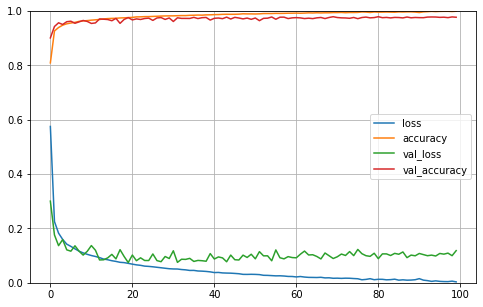

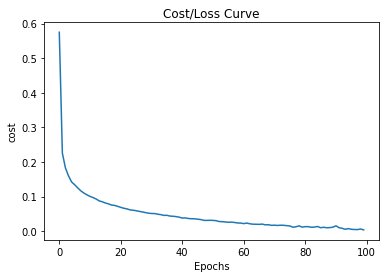

In [ ]:
## Plot the learning curves 
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H_nn_hog_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Plot only the loss train loss
plt.plot(H_nn_hog_sgd.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()